<h1 align="center">Volume 1: Facial Recognition.</h1>

    <Name> Sukyoung Kwak
    <Class> Math 345 - 2
    <Date> November 29th lol

In [1]:
!pip install imageio

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable


In [4]:
import os
import numpy as np
from imageio import imread
from matplotlib import pyplot as plt
import random
from scipy import linalg as la

In [5]:
import sys
sys.path.append('/home/sk437@byu.local/.local/lib/python3.8/site-packages')

### Helper Functions

In [6]:
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory. 
    Flatten and convert each image to grayscale.
    
    Parameters:
        path (str): The directory containing the dataset of images.  
    
    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)


def sample_faces(k, path="./faces94"):
    """Generate k sample images from the given path.

    Parameters:
        n (int): The number of sample images to obtain. 
        path(str): The directory containing the dataset of images.  
    
    Yields:
        ((mn,) ndarray): An flattend mn-array representing a single
        image. k images are yielded in total.
    """
    files = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, k, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

### Problem 1 

- Implement `show()`.
- Use `show()` to display a face from the `faces94` dataset.

In [7]:
def show(image, m=200, n=180):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.
    
    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
    """
    #reshape to conver the flattened image into its original dimension
    faces = np.reshape(image, (m, n))
    
    #show the picture
    plt.imshow(faces,cmap="gray")
    plt.axis("off")

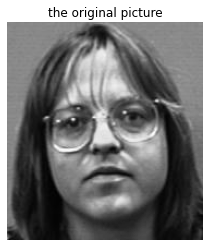

In [8]:
F = get_faces("faces94")
plt.title("the original picture")
T = show(F[:,10])

In [9]:
class FacialRec(object):
    """Class for storing a database of face images, with methods for
    matching other faces to the database.
    
    Attributes:
        F ((mn,k) ndarray): The flatten images of the dataset, where
            k is the number of people, and each original image is mxn.
        mu ((mn,) ndarray): The mean of all flatten images.
        Fbar ((mn,k) ndarray): The images shifted by the mean.
        U ((mn,k) ndarray): The U in the compact SVD of Fbar;
            the columns are the eigenfaces.
    """
    # Problems 2-3
    def __init__(self, path='./faces94'):
        """Initialize the F, mu, Fbar, and U attributes.
        This is the main part of the computation.
        """
        #get the picture
        self.F = get_faces()
        #get the mean face
        self.mu = np.sum(self.F,axis = 1)/np.shape(self.F)[1]
        #get the pictuers shifted
        self.Fbar = self.F - self.mu.reshape(-1,1)
        #get U by SVD
        self.U = la.svd(self.Fbar, full_matrices=False)[0]
        

    # Problem 3
    def project(self, A, s):
        """Project a face vector onto the subspace spanned by the first s
        eigenfaces, and represent that projection in terms of those eigenfaces.
        
        Parameters:
            A((mn,) or (mn,l) ndarray): The array to be projected. 
            s(int): the number of eigenfaces.
        Returns: 
            ((s,) ndarray): An array of the projected image of s eigenfaces.
        """
        #get the projection
        proj = (self.U[:,:s]).T@A
        
        return proj

    # Problem 5
    def find_nearest(self, g, s=38):
        """Find the index j such that the jth column of F is the face that is
        closest to the face image 'g'.
        
        Parameters:
            g ((mn,) ndarray): A flattened face image.
            s (int): the number of eigenfaces to use in the projection.

        Returns:
            (int): the index of the column of F that is the best match to
                   the input face image 'g'.
        """
        #get the projection for F
        F_pro = self.project(self.Fbar,s)
        #get the projection for G
        G_pro = self.project((g-self.mu),s).reshape(-1,1)
        
        return np.argmin(la.norm(F_pro - G_pro, axis = 0))

    # Problem 6
    def match(self, image, s=38, m=200, n=180):
        """Display an image along with its closest match from the dataset. 
        
        Parameters:
            image ((mn,) ndarray): A flattened face image.
            s (int): The number of eigenfaces to use in the projection.
            m (int): The original number of rows in the image.
            n (int): The original number of columns in the image.
        """
        #Get the index
        j = self.find_nearest(image)
        fig, (ax1, ax2) = plt.subplots(1, 2)
        #plug g
        ax1.imshow(image.reshape((m, n)), cmap="gray")
        #plug the original picture
        ax2.imshow(self.F[:,j].reshape((m, n)), cmap="gray")
        ax1.axis("off")
        ax2.axis("off")
        plt.show()        

### Problem 2

- In `FacialRec.__init__()`, compute $F$, the mean face $\boldsymbol{\mu}$, and the mean-shifted faces $\bar{F}$.
Store each as an attribute.

- Initialize a `FacialRec` object and display its mean face, plus an original image and its shifted face.

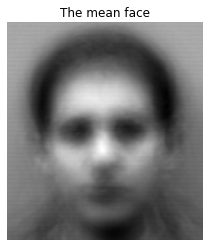

In [10]:
F = FacialRec()
plt.title("The mean face")
show(F.mu)

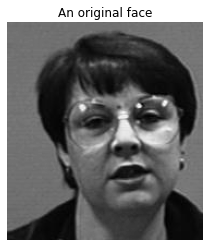

In [11]:
plt.title("An original face")
show(F.F[:,9])

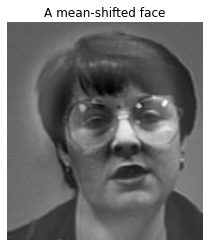

In [12]:
plt.title("A mean-shifted face")
show(F.Fbar[:,9])

### Problem 3

- In `FacialRec.__init__()`, compute the compact SVD of $\bar{F}$ and store the $U$ as an attribute.
- Use `show()` to display some of the eigenfaces (the columns of $U$).
- Implement `FacialRec.project()` (in a single line).


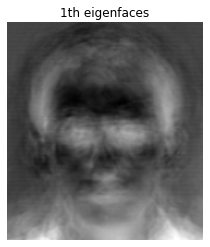

In [13]:
F = FacialRec()
plt.title("1th eigenfaces")
show(F.U[:,0])

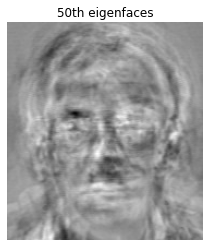

In [14]:
F = FacialRec()
plt.title("50th eigenfaces")
show(F.U[:,49])

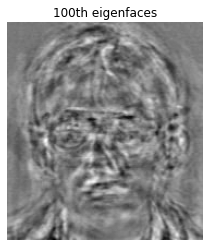

In [15]:
F = FacialRec()
plt.title("100th eigenfaces")
show(F.U[:,99])

### Problem 4

- Select one of the shifted images $\bar{\mathbf{f}}_i$.
- For at least 4 values of $s$, use `FacialRec.project()` to compute the corresponding $s$-projection $\widehat{\mathbf{f}}_i$, then compute the reconstruction $\widetilde{\mathbf{f}}_i$.
- Display each of the reconstructions and the original image.

(-0.5, 179.5, 199.5, -0.5)

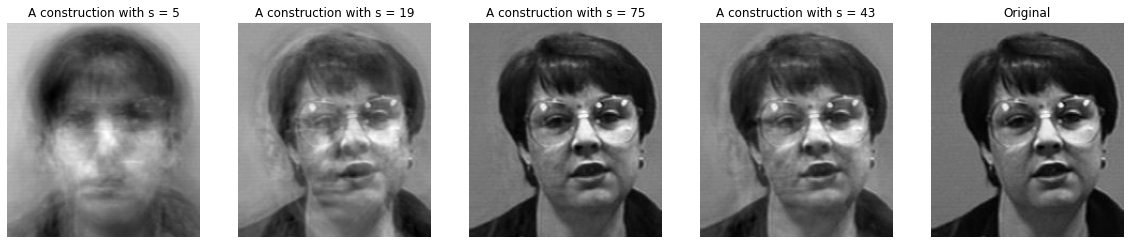

In [16]:
#Instantiation
F = FacialRec()
A = F.Fbar[:,9]
plt.figure(figsize=(20,6))

#s = 5
F_til = (F.U[:,:5]@F.project(A,5)) +F.mu
F_tilda = np.reshape(F_til, (200,180))
s_5 = plt.subplot(151)
plt.title("A construction with s = 5")
s_5.imshow(F_tilda, cmap="gray")
s_5.axis("off")

#s = 19
F_til = (F.U[:,:19]@F.project(A,19)) +F.mu
F_tilda = np.reshape(F_til, (200,180))
s_19 = plt.subplot(152)
plt.title("A construction with s = 19")
s_19.imshow(F_tilda, cmap="gray")
s_19.axis("off")

#s = 75
F_til = (F.U[:,:75]@F.project(A,75)) +F.mu
F_tilda = np.reshape(F_til, (200,180))
s_75 = plt.subplot(153)
plt.title("A construction with s = 75")
s_75.imshow(F_tilda, cmap="gray")
s_75.axis("off")

#s = 43
F_til = (F.U[:,:43]@F.project(A,43)) +F.mu
F_tilda = np.reshape(F_til, (200,180))
s_43 = plt.subplot(154)
plt.title("A construction with s = 43")
s_43.imshow(F_tilda, cmap="gray")
s_43.axis("off")

#original
f = np.reshape(F.F[:,9], (200,180))
orig = plt.subplot(155)
plt.title("Original")
orig.imshow(f, cmap="gray")
orig.axis("off")

### Problem 5 
Implement `FacialRec.find_nearest()`.

### Problem 6

- Implement `FacialRec.match()`.
- Generate some random faces with `sample_faces()`, and use `FacialRec.match()` to find the closest match (let $s=38$).
- For each test, display the sample image and its closest match.

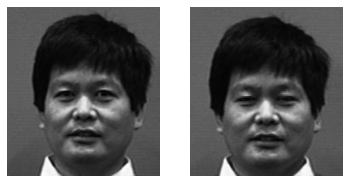

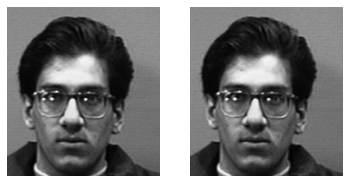

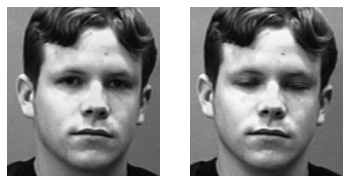

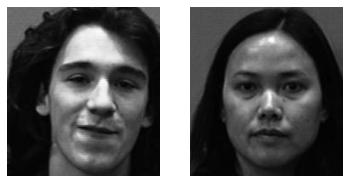

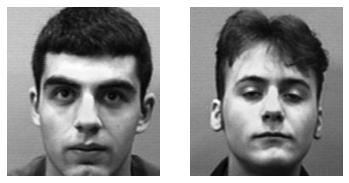

In [17]:
def sample_faces(num_faces, path="./faces94"):
    # Get the list of possible images.
    files = [] 
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":
                # Only get jpg images.
                files.append(dirpath+"/"+fname)

    # Get a subset of the image names and yield the images one at a time.
    test_files = np.random.choice(files, num_faces, replace=False)
    for fname in test_files:
        yield np.ravel(imread(fname, as_gray=True))

        
Momo = FacialRec()
for test_image in sample_faces(5):
    Momo.match(test_image)